In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
movieData = pd.read_csv('top-500-movies.csv')
movieData.head()

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year,percentage_domestic,percentage_worldwide
0,1,23/4/2019,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0,214.59,699.45
1,2,20/5/2011,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0,63.61,275.91
2,3,22/4/2015,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0,125.76,382.28
3,4,16/12/2015,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0,306.10,674.71
4,5,25/4/2018,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0,226.27,682.79


In [3]:
production_cost = pd.DataFrame(movieData['production_cost'])
worldwide_gross = pd.DataFrame(movieData['worldwide_gross'])
domestic_gross = pd.DataFrame(movieData['domestic_gross'])
runtime = pd.DataFrame(movieData['runtime'])



In [4]:
movieNumData = pd.DataFrame(movieData[['production_cost', 'worldwide_gross', 'domestic_gross', 'runtime']])
movieNumData.head()

,production_cost,worldwide_gross,domestic_gross,runtime
0,400000000,2797800564,858373000,181.0
1,379000000,1045713802,241071802,136.0
2,365000000,1395316979,459005868,141.0
3,306000000,2064615817,936662225,136.0
4,300000000,2048359754,678815482,156.0


In [5]:
movieNumData.describe()

,production_cost,worldwide_gross,domestic_gross,runtime
count,5.000000e+02,5.000000e+02,5.000000e+02,487.000000
mean,1.494954e+08,4.697776e+08,1.696114e+08,121.885010
std,4.774040e+07,3.850620e+08,1.421642e+08,22.399642
min,9.100000e+07,0.000000e+00,0.000000e+00,76.000000
25%,1.100000e+08,2.122188e+08,7.047110e+07,104.500000
50%,1.400000e+08,3.671458e+08,1.318470e+08,120.000000
75%,1.750000e+08,6.484251e+08,2.185998e+08,135.000000
max,4.000000e+08,2.910371e+09,9.366622e+08,210.000000


<AxesSubplot:>

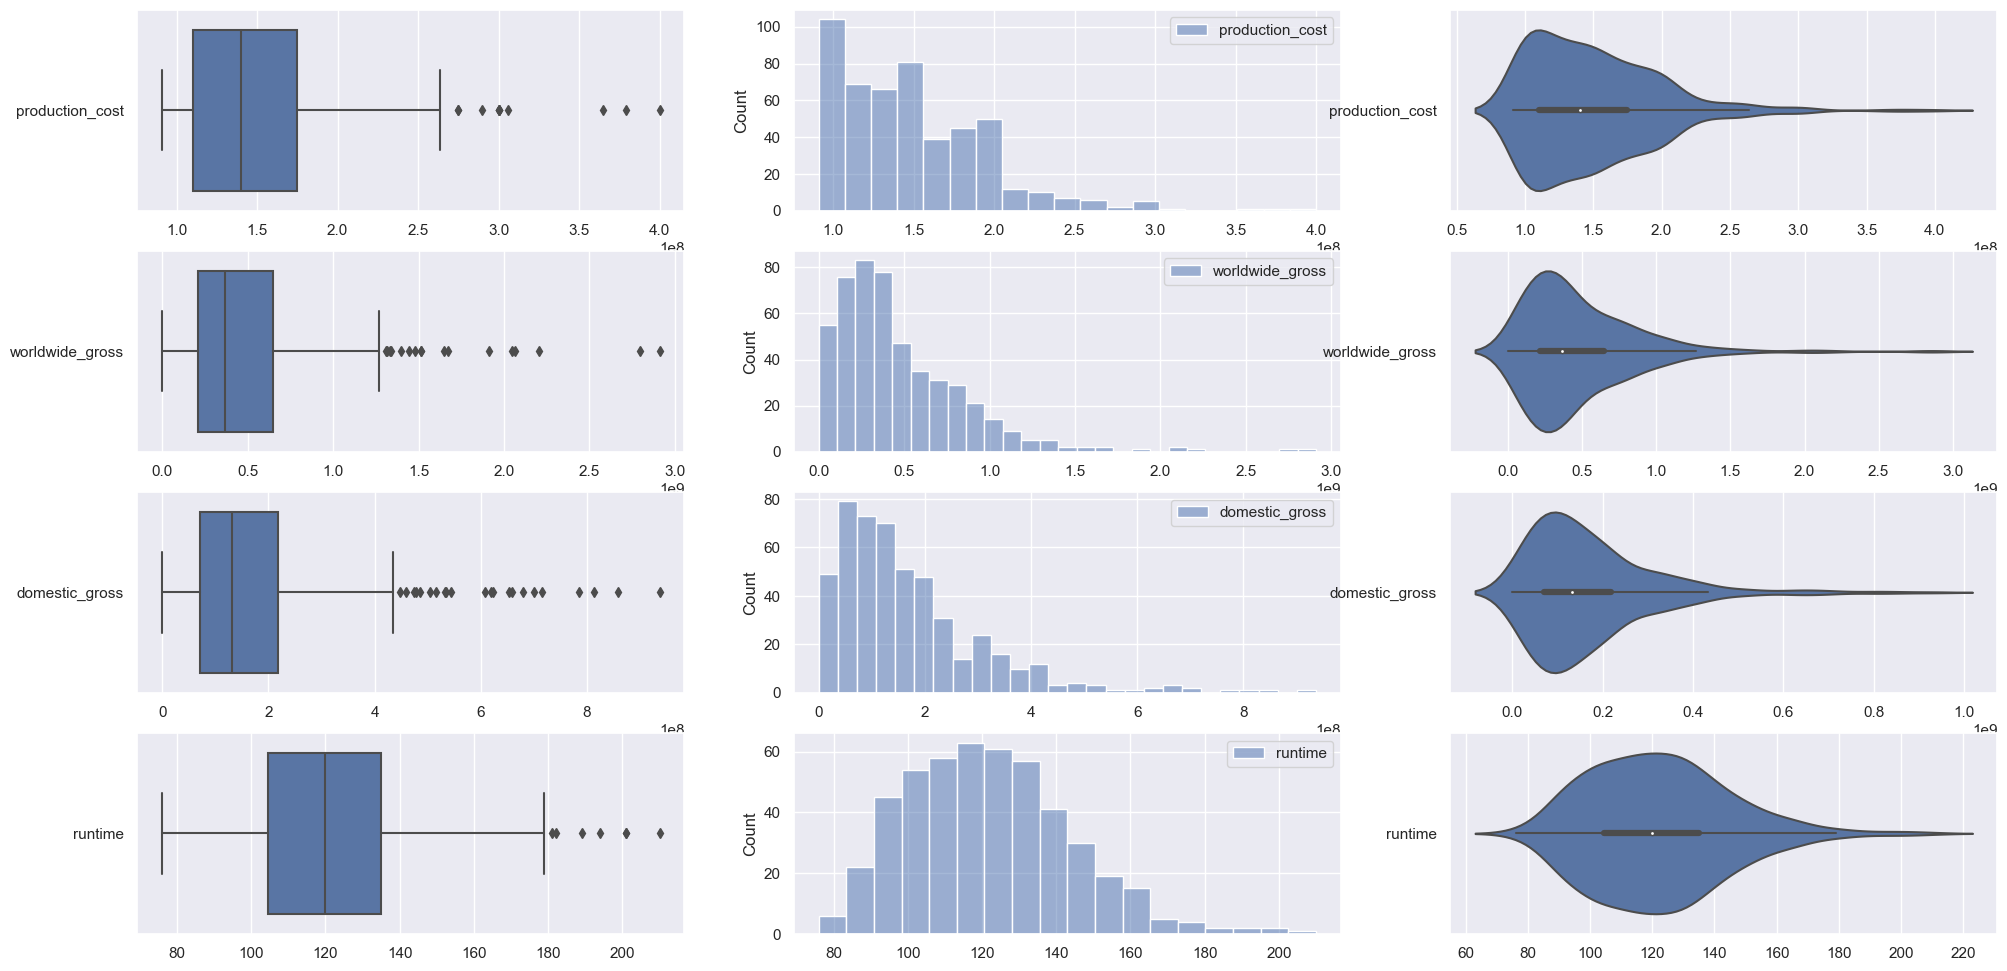

In [6]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(4, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for production_cost
sb.boxplot(data = production_cost, orient = "h", ax = axes[0,0])
sb.histplot(data = production_cost, ax = axes[0,1])
sb.violinplot(data = production_cost, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for percentage_worldwide
sb.boxplot(data = worldwide_gross, orient = "h", ax = axes[1,0])
sb.histplot(data = worldwide_gross, ax = axes[1,1])
sb.violinplot(data = worldwide_gross, orient = "h", ax = axes[1,2])


# Plot the basic uni-variate figures for percentage_domestic
sb.boxplot(data = domestic_gross, orient = "h", ax = axes[2,0])
sb.histplot(data = domestic_gross, ax = axes[2,1])
sb.violinplot(data = domestic_gross, orient = "h", ax = axes[2,2])


# Plot the basic uni-variate figures for percentage_domestic
sb.boxplot(data = runtime, orient = "h", ax = axes[3,0])
sb.histplot(data = runtime, ax = axes[3,1])
sb.violinplot(data = runtime, orient = "h", ax = axes[3,2])

In [7]:
# Calculate the quartiles
Q1 = production_cost.quantile(0.25)
Q3 = production_cost.quantile(0.75)

# Rule to identify outliers
rule = ((production_cost < (Q1 - 1.5 * (Q3 - Q1))) | (production_cost > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

production_cost    11
dtype: int64

In [8]:
# Calculate the quartiles
Q1 = worldwide_gross.quantile(0.25)
Q3 = worldwide_gross.quantile(0.75)

# Rule to identify outliers
rule = ((worldwide_gross < (Q1 - 1.5 * (Q3 - Q1))) | (worldwide_gross > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

worldwide_gross    17
dtype: int64

In [9]:
# Calculate the quartiles
Q1 = domestic_gross.quantile(0.25)
Q3 = domestic_gross.quantile(0.75)

# Rule to identify outliers
rule = ((domestic_gross < (Q1 - 1.5 * (Q3 - Q1))) | (domestic_gross > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

domestic_gross    22
dtype: int64

In [10]:
movieNumData.skew()

production_cost    1.391883
worldwide_gross    2.045557
domestic_gross     1.879529
runtime            0.646597
dtype: float64

,production_cost,worldwide_gross
production_cost,1.000000,0.537454
worldwide_gross,0.537454,1.000000


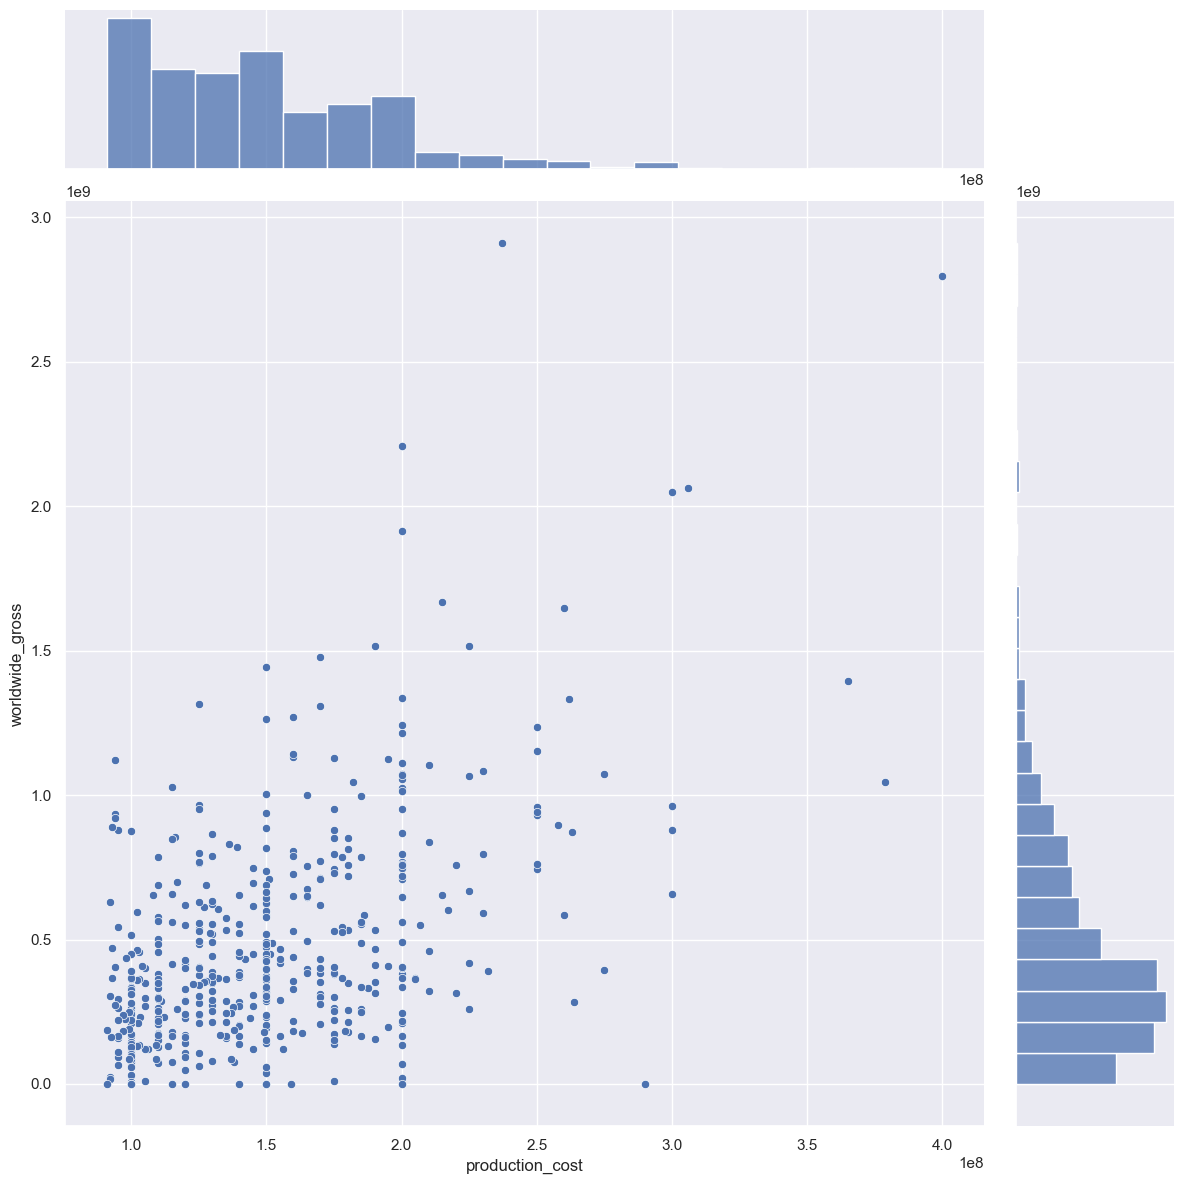

In [11]:
jointDFworldwide = pd.concat([production_cost, worldwide_gross], axis = 1).reindex(worldwide_gross.index)
jointDFworldwide
sb.jointplot(data = jointDFworldwide, x = "production_cost", y = "worldwide_gross", height = 12)
jointDFworldwide.corr()



<AxesSubplot:>

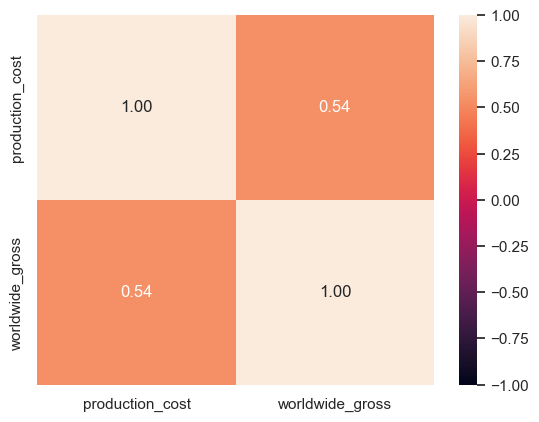

In [13]:
sb.heatmap(jointDFworldwide.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [14]:
#jointDFdomestic = pd.concat([production_cost, domestic_gross], axis = 1).reindex(domestic_gross.index)
#jointDFdomestic
#sb.jointplot(data = jointDFdomestic, x = "production_cost", y = "domestic_gross", height = 20)
#jointDFdomestic.corr()

In [15]:
#jointDFruntime = pd.concat([production_cost, runtime], axis = 1).reindex(runtime.index)
#jointDFruntime
#sb.jointplot(data = jointDFruntime, x = "production_cost", y = "runtime", height = 20)
#jointDFruntime.corr()

In [16]:
movieCatData = pd.DataFrame(movieData[['genre', 'mpaa']])
movieCatData.head()

,genre,mpaa
0,Action,PG-13
1,Adventure,PG-13
2,Action,PG-13
3,Adventure,PG-13
4,Action,PG-13


In [17]:
movieCatData = movieCatData.astype('category')

In [18]:
movieCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   genre   495 non-null    category
 1   mpaa    492 non-null    category
dtypes: category(2)
memory usage: 1.7 KB


In [19]:
movieCatData.describe()

,genre,mpaa
count,495,492
unique,10,5
top,Adventure,PG-13
freq,213,287


In [20]:
movieCatData["genre"].nunique()

10

In [21]:
movieCatData["genre"].value_counts()

Adventure            213
Action               202
Drama                 26
Thriller/Suspense     24
Comedy                11
Musical                8
Black Comedy           3
Horror                 3
Western                3
Romantic Comedy        2
Name: genre, dtype: int64

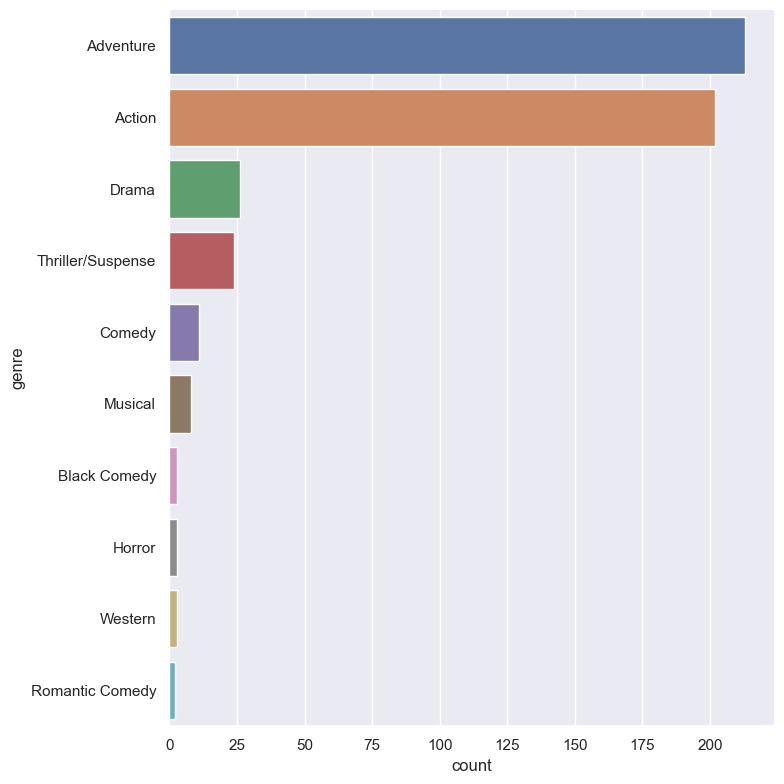

In [23]:
sb.catplot(y = 'genre', data = movieCatData, 
           kind = "count", 
           height = 8, 
           order = movieCatData['genre'].value_counts().index)

In [24]:
movieCatData["mpaa"].nunique()

5

In [26]:
movieCatData["mpaa"].value_counts()

PG-13      287
PG         124
R           63
G           17
Unrated      1
Name: mpaa, dtype: int64

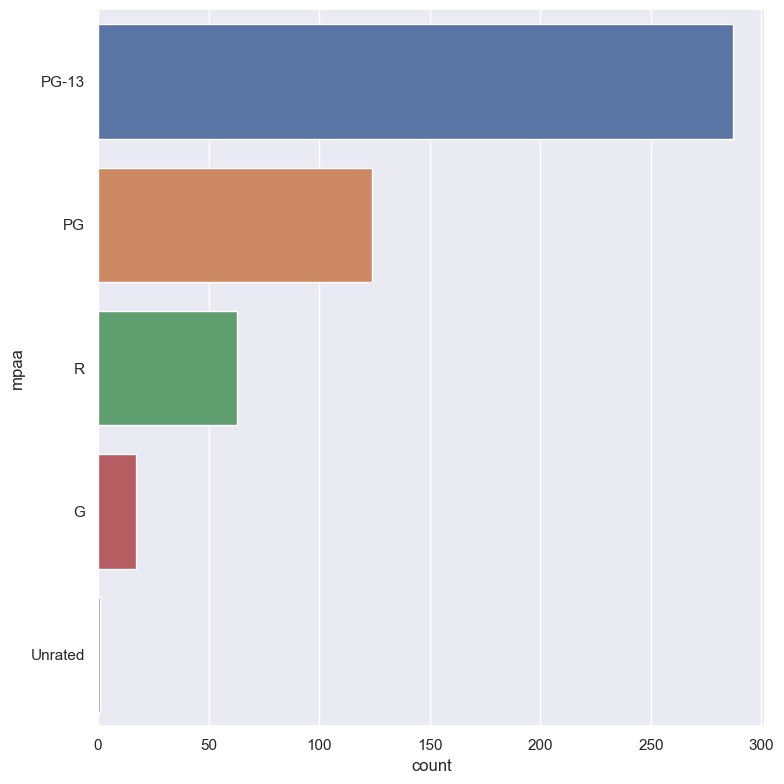

In [27]:
sb.catplot(y = 'mpaa', data = movieCatData, 
           kind = "count", 
           height = 8, 
           order = movieCatData['mpaa'].value_counts().index)

In [29]:
movieCatData = pd.concat([movieCatData, movieData["worldwide_gross"]], axis = 1).reindex(movieCatData.index)
movieCatData.head()

,genre,mpaa,worldwide_gross
0,Action,PG-13,2797800564
1,Adventure,PG-13,1045713802
2,Action,PG-13,1395316979
3,Adventure,PG-13,2064615817
4,Action,PG-13,2048359754


<AxesSubplot:xlabel='genre', ylabel='worldwide_gross'>

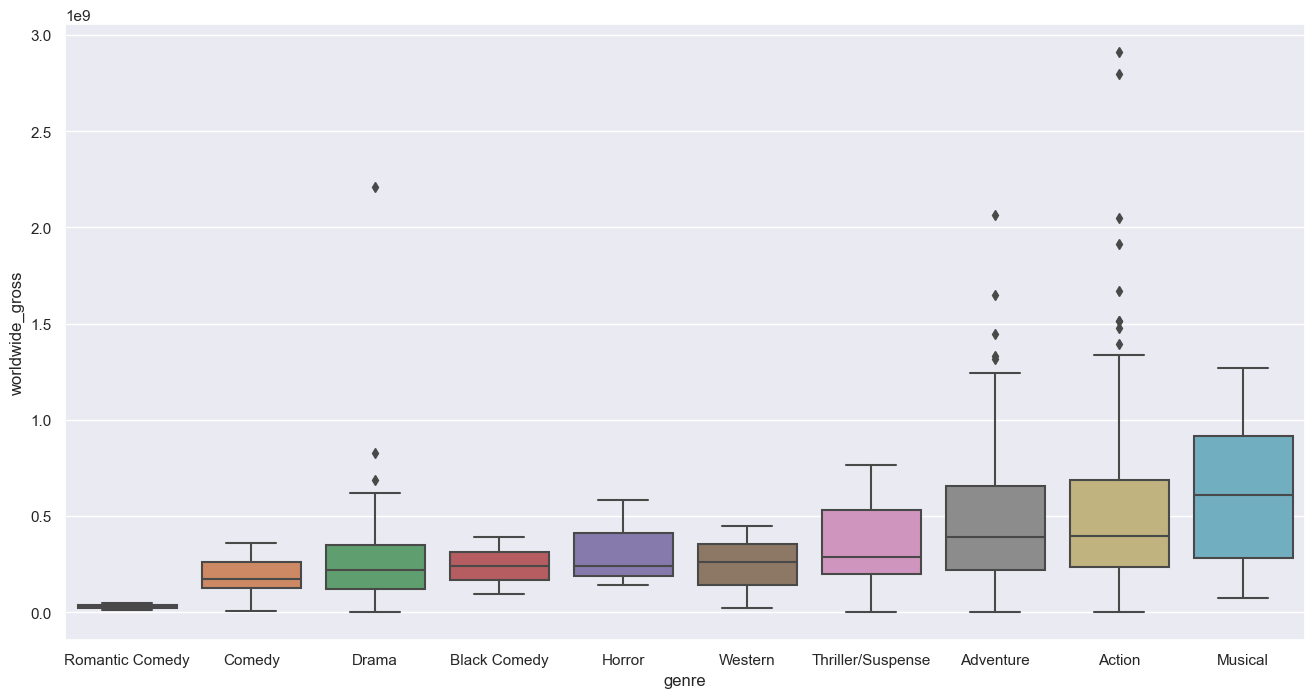

In [31]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'genre', y = 'worldwide_gross', data = movieCatData,
           order = movieCatData.groupby('genre')['worldwide_gross'].median().sort_values().index)

<AxesSubplot:xlabel='mpaa', ylabel='worldwide_gross'>

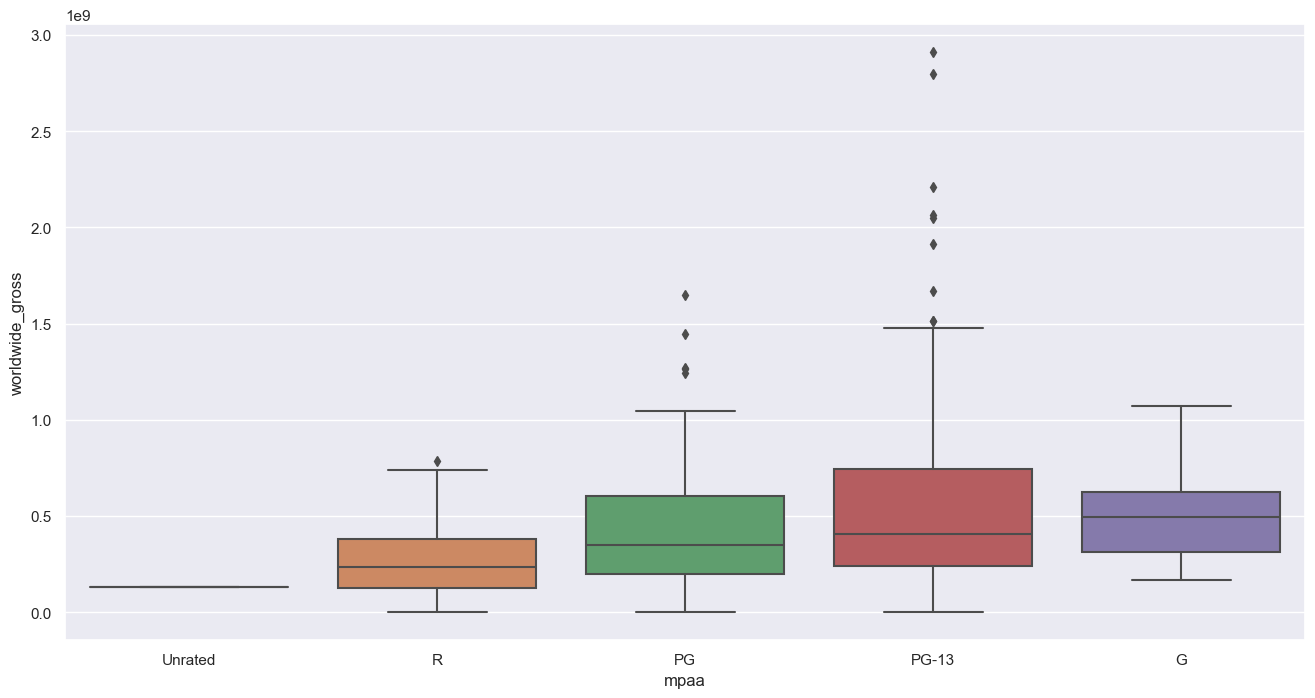

In [33]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'mpaa', y = 'worldwide_gross', data = movieCatData,
           order = movieCatData.groupby('mpaa')['worldwide_gross'].median().sort_values().index)